In [ ]:
import pandas as pd
import glob
import os

csv_files = glob.glob('UNSW_2018_IoT_Botnet_Full5pc_1.csv')
csv_files = glob.glob('UNSW_2018_IoT_Botnet_Full5pc_2.csv')
csv_files = glob.glob('UNSW_2018_IoT_Botnet_Full5pc_3.csv')
csv_files = glob.glob('UNSW_2018_IoT_Botnet_Full5pc_4.csv')

chunk_size = 100000
data_chunks = []

print(" Starting to read and combine all datasets...")

for file in csv_files:
    print(f" Processing file: {file}")
    try:
        for chunk in pd.read_csv(file, chunksize=chunk_size):
            data_chunks.append(chunk)
    except Exception as e:
        print(f" Error reading {file}: {e}")

print("Concatenating all chunks into one DataFrame...")
combined_df = pd.concat(data_chunks, ignore_index=True, sort=True)

output_file = 'combined_dataset.csv'
combined_df.to_csv(output_file, index=False)
print(f" Done! Combined dataset with all rows and attributes saved as '{output_file}'")

print("\n Final dataset info:")
print(f"Total rows: {combined_df.shape[0]}")
print(f"Total columns: {combined_df.shape[1]}")
print(f"Column names: {combined_df.columns.tolist()}")

 Starting to read and combine all datasets...
 Processing file: UNSW_2018_IoT_Botnet_Full5pc_4.csv


C:\Users\ruika\AppData\Local\Temp\ipykernel_9444\447607860.py:21: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunk_size):
C:\Users\ruika\AppData\Local\Temp\ipykernel_9444\447607860.py:21: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunk_size):
C:\Users\ruika\AppData\Local\Temp\ipykernel_9444\447607860.py:21: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunk_size):
C:\Users\ruika\AppData\Local\Temp\ipykernel_9444\447607860.py:21: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunk_size):
C:\Users\ruika\AppData\Local\Temp\ipykernel_9444\447607860.py:21: DtypeWarning: Columns (7,9) have mixed

🔗 Concatenating all chunks into one DataFrame...
 Done! Combined dataset with all rows and attributes saved as 'combined_dataset.csv'

 Final dataset info:
Total rows: 668522
Total columns: 46
Column names: ['AR_P_Proto_P_Dport', 'AR_P_Proto_P_DstIP', 'AR_P_Proto_P_Sport', 'AR_P_Proto_P_SrcIP', 'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP', 'Pkts_P_State_P_Protocol_P_DestIP', 'Pkts_P_State_P_Protocol_P_SrcIP', 'TnBPDstIP', 'TnBPSrcIP', 'TnP_PDstIP', 'TnP_PSrcIP', 'TnP_PerProto', 'TnP_Per_Dport', 'attack', 'bytes', 'category', 'daddr', 'dbytes', 'dpkts', 'dport', 'drate', 'dur', 'flgs', 'flgs_number', 'ltime', 'max', 'mean', 'min', 'pkSeqID', 'pkts', 'proto', 'proto_number', 'rate', 'saddr', 'sbytes', 'seq', 'spkts', 'sport', 'srate', 'state', 'state_number', 'stddev', 'stime', 'subcategory', 'sum']


In [2]:
df = pd.read_csv('combined_dataset.csv')

C:\Users\ruika\AppData\Local\Temp\ipykernel_9444\3834789375.py:1: DtypeWarning: Columns (20,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('combined_dataset.csv')


In [3]:
df.shape

(668522, 46)

In [ ]:
attack_percentages = df['attack'].value_counts(normalize=True) * 100

attack_percentages.index = ['Non-Attack' if val == 0 else 'Attack' for val in attack_percentages.index]

print(attack_percentages)

Attack        99.928649
Non-Attack     0.071351
Name: proportion, dtype: float64


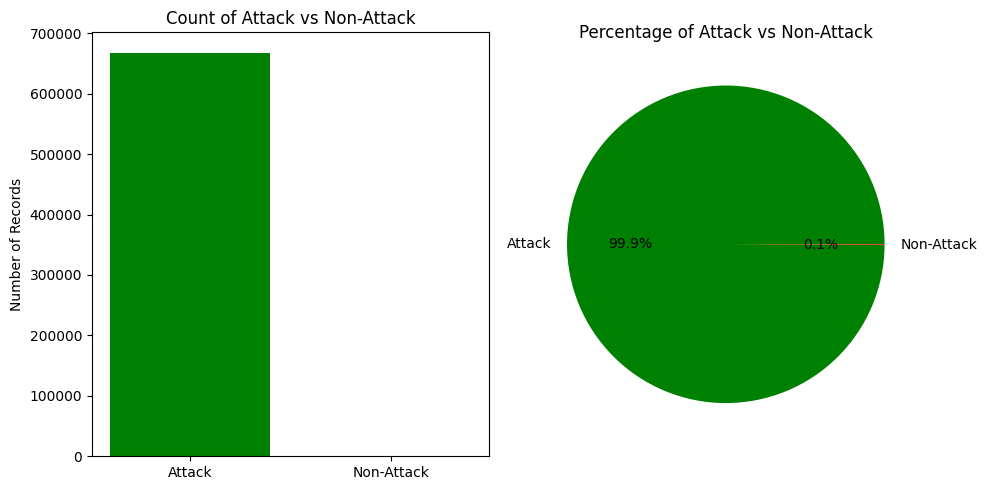

In [ ]:
import matplotlib.pyplot as plt

counts = df['attack'].value_counts()
labels = ['Non-Attack' if val == 0 else 'Attack' for val in counts.index]
percentages = (counts / counts.sum()) * 100

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(labels, counts, color=['green', 'red'])
plt.title("Count of Attack vs Non-Attack")
plt.ylabel("Number of Records")

plt.subplot(1, 2, 2)
plt.pie(percentages, labels=labels, autopct='%1.1f%%', colors=['green', 'red'])
plt.title("Percentage of Attack vs Non-Attack")

plt.tight_layout()
plt.show()

In [6]:
import seaborn as sns

Unique categories: ['DDoS' 'Normal' 'Reconnaissance' 'Theft']
Unique subcategories: ['UDP' 'Normal' 'OS_Fingerprint' 'Service_Scan' 'Data_Exfiltration'
 'Keylogging']
Total DoS records: 0
Total ReDoS records: 0


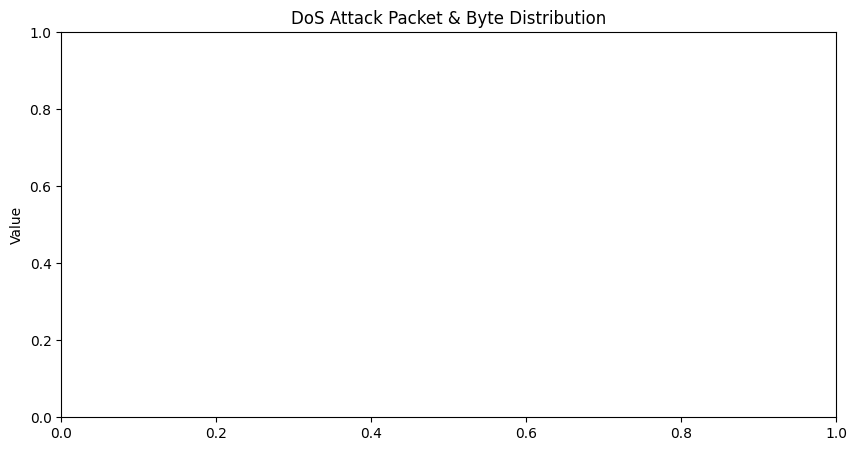

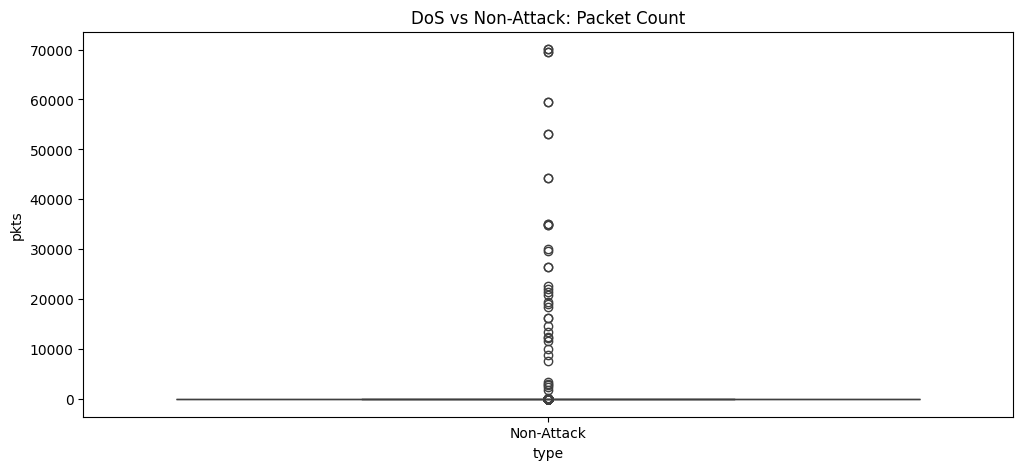

 No ReDoS records found in the dataset.


In [ ]:
# checking unique values
print("Unique categories:", df['category'].unique())
print("Unique subcategories:", df['subcategory'].unique())

# filtering dos and redos records
dos_df = df[df['subcategory'].str.contains('DoS', case=False, na=False)]
redos_df = df[df['subcategory'].str.contains('ReDoS', case=False, na=False)]

# count of dos and redos records
print("Total DoS records:", len(dos_df))
print("Total ReDoS records:", len(redos_df))

# boxplot for dos attack features- boxplot of pkts and bytes for dos attacks
plt.figure(figsize=(10, 5))
sns.boxplot(data=dos_df[['pkts', 'bytes']], palette='coolwarm')
plt.title("DoS Attack Packet & Byte Distribution")
plt.ylabel("Value")
plt.show()

# dos vs non-attack packets
non_attack_df = df[df['attack'] == 0]
combined = pd.concat([
    dos_df.assign(type='DoS'),
    non_attack_df.assign(type='Non-Attack')
])

plt.figure(figsize=(12, 5))
sns.boxplot(x='type', y='pkts', data=combined)
plt.title("DoS vs Non-Attack: Packet Count")
plt.show()

# redos duration histogram
if len(redos_df) > 0:
    plt.figure(figsize=(10, 5))
    sns.histplot(redos_df['dur'], bins=30, kde=True, color='purple')
    plt.title("ReDoS Duration Distribution")
    plt.xlabel("Duration")
    plt.ylabel("Frequency")
    plt.show()
else:
    print(" No ReDoS records found in the dataset.")


In [ ]:
# column name cleaning
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# missing values detection
missing = df.isnull().sum()
print("Missing values:\n", missing[missing > 0])

# Duplicate Row Removal
initial_shape = df.shape
df.drop_duplicates(inplace=True)
print(f"Removed {initial_shape[0] - df.shape[0]} duplicate rows.")

# Dropping Unnamed Columns
df = df.loc[:, ~df.columns.str.contains('^unnamed')]

# Checking Unique Values
if 'category' in df.columns:
    print("Unique values in 'category':", df['category'].unique())
if 'subcategory' in df.columns:
    print("Unique values in 'subcategory':", df['subcategory'].unique())

# Final Dataset Info
print("\nCleaned dataset shape:", df.shape)
print("Data types:\n", df.dtypes)

Missing values:
 Series([], dtype: int64)
Removed 0 duplicate rows.
Unique values in 'category': ['DDoS' 'Normal' 'Reconnaissance' 'Theft']
Unique values in 'subcategory': ['UDP' 'Normal' 'OS_Fingerprint' 'Service_Scan' 'Data_Exfiltration'
 'Keylogging']

Cleaned dataset shape: (668522, 46)
Data types:
 ar_p_proto_p_dport                  float64
ar_p_proto_p_dstip                  float64
ar_p_proto_p_sport                  float64
ar_p_proto_p_srcip                  float64
n_in_conn_p_dstip                     int64
n_in_conn_p_srcip                     int64
pkts_p_state_p_protocol_p_destip      int64
pkts_p_state_p_protocol_p_srcip       int64
tnbpdstip                             int64
tnbpsrcip                             int64
tnp_pdstip                            int64
tnp_psrcip                            int64
tnp_perproto                          int64
tnp_per_dport                         int64
attack                                int64
bytes                              

C:\Users\ruika\AppData\Local\Temp\ipykernel_9444\1296680948.py:9: DtypeWarning: Columns (20,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("combined_dataset.csv")


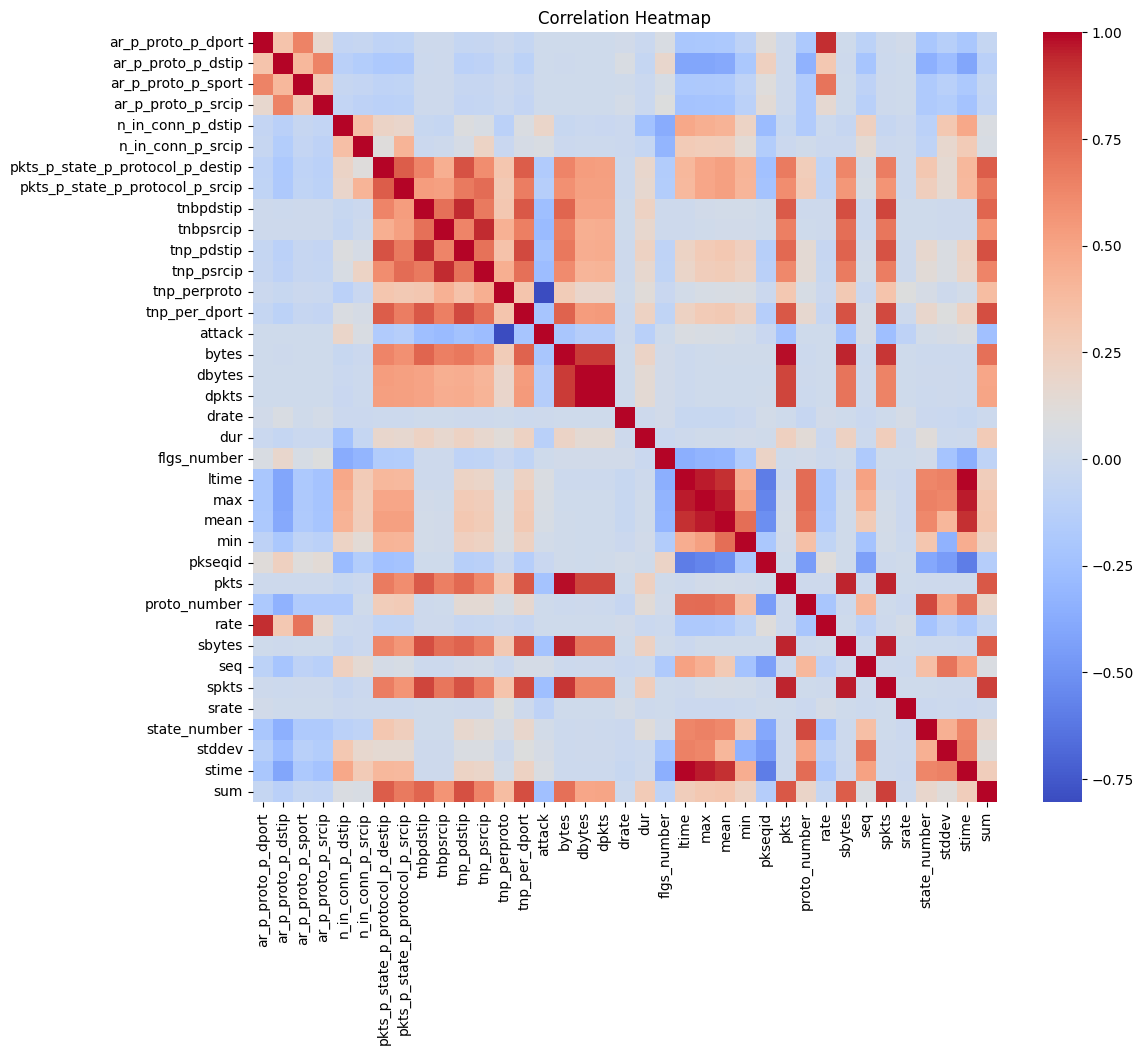

Top correlated features with 'attack':
 tnp_perproto     0.804492
tnbpsrcip        0.286662
tnp_psrcip       0.271961
tnbpdstip        0.257517
spkts            0.254837
sum              0.253827
tnp_pdstip       0.238696
pkts             0.232891
sbytes           0.228514
tnp_per_dport    0.212446
Name: attack, dtype: float64

Low-variance filter selected features: ['ar_p_proto_p_dport', 'ar_p_proto_p_dstip', 'ar_p_proto_p_sport', 'ar_p_proto_p_srcip', 'n_in_conn_p_dstip', 'n_in_conn_p_srcip', 'pkts_p_state_p_protocol_p_destip', 'pkts_p_state_p_protocol_p_srcip', 'tnbpdstip', 'tnbpsrcip', 'tnp_pdstip', 'tnp_psrcip', 'tnp_perproto', 'tnp_per_dport', 'bytes', 'dbytes', 'dpkts', 'drate', 'dur', 'flgs_number', 'ltime', 'max', 'mean', 'min', 'pkseqid', 'pkts', 'proto_number', 'rate', 'sbytes', 'seq', 'spkts', 'srate', 'state_number', 'stddev', 'stime', 'sum']

Top features using Chi2:
 tnbpsrcip       1.076362e+12
bytes           9.954825e+11
tnbpdstip       6.625210e+11
sbytes          6.

C:\Users\ruika\AppData\Local\Temp\ipykernel_9444\1296680948.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[:10], y=importances.index[:10], palette='viridis')


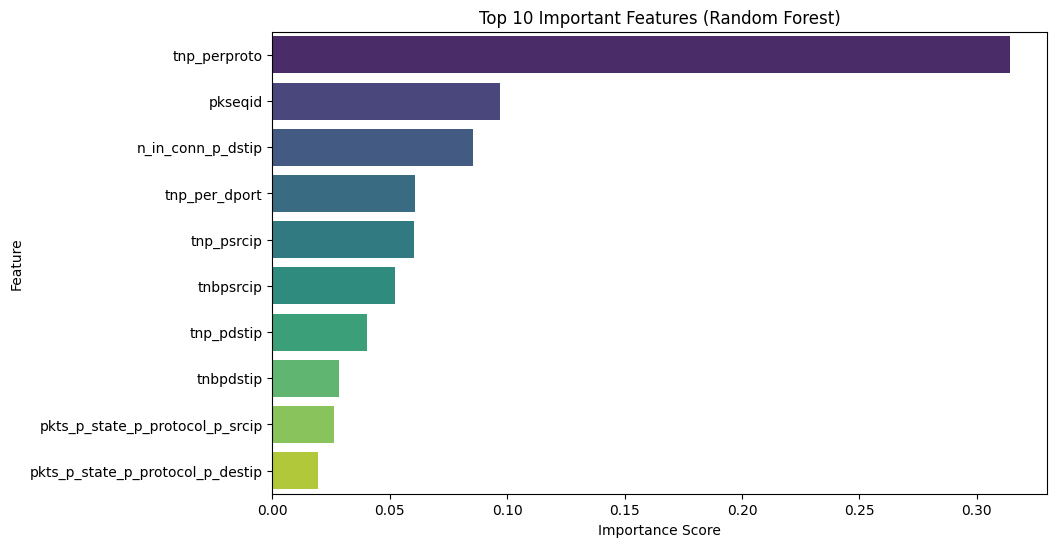

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2, VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Cleaning & Preparing Data
df = pd.read_csv("combined_dataset.csv")

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

df = df.select_dtypes(include=['int64', 'float64'])

# Correlation Heatmap
plt.figure(figsize=(12, 10))
cor = df.corr()
sns.heatmap(cor, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

# Top Correlated Features
top_corr = cor['attack'].abs().sort_values(ascending=False)[1:11]
print("Top correlated features with 'attack':\n", top_corr)

# Low-Variance Feature Removal
selector = VarianceThreshold(threshold=0.01)
reduced_data = selector.fit_transform(df.drop('attack', axis=1))
selected_features = df.drop('attack', axis=1).columns[selector.get_support()]

print("\nLow-variance filter selected features:", list(selected_features))

df_chi = df.fillna(0).copy()
X = df_chi.drop('attack', axis=1)
y = df_chi['attack']

# Chi-Squared Feature Selection
selector_chi = SelectKBest(score_func=chi2, k=10)
selector_chi.fit(X, y)
chi_scores = pd.Series(selector_chi.scores_, index=X.columns)
chi_scores = chi_scores.sort_values(ascending=False)
print("\nTop features using Chi2:\n", chi_scores.head(10))

# Random Forest Feature Importance
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[:10], y=importances.index[:10], palette='viridis')
plt.title("Top 10 Important Features (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

Bagging- Combines multiple models (decision trees) trained on different subsets of the data to reduce variance and prevent overfitting.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Label encoding
le = LabelEncoder()
y = le.fit_transform(df['attack'])

X = df.drop(columns=['attack'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bagging: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluation
print("Random Forest (Bagging) Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Random Forest (Bagging) Results:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00    133605

    accuracy                           1.00    133705
   macro avg       1.00      1.00      1.00    133705
weighted avg       1.00      1.00      1.00    133705



Boosting- Trains models sequentially to correct errors made by previous models, aiming to reduce bias.

In [11]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train
xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb.predict(X_test)

# Evaluate
print("XGBoost (Boosting) Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

c:\Users\ruika\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:33:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost (Boosting) Results:
Accuracy: 0.9988332523091882
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       1.00      1.00      1.00    133605

    accuracy                           1.00    133705
   macro avg       0.50      0.50      0.50    133705
weighted avg       1.00      1.00      1.00    133705



Stacking- Combines the predictions of multiple models using a meta-model (like logistic regression) to make the final prediction.

In [12]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Define base learners
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
]

# Meta learner
meta_learner = LogisticRegression()

# Stacking ensemble
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)

# Train
stacking_clf.fit(X_train, y_train)

# Predict
y_pred_stack = stacking_clf.predict(X_test)

# Evaluate
print("Stacking Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_stack))
print(classification_report(y_test, y_pred_stack))

c:\Users\ruika\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:35:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\ruika\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:45:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\ruika\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:45:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\ruika\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:45:21] WARNING: C:\actio

Stacking Classifier Results:
Accuracy: 0.9992520848135822
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       1.00      1.00      1.00    133605

    accuracy                           1.00    133705
   macro avg       0.50      0.50      0.50    133705
weighted avg       1.00      1.00      1.00    133705



c:\Users\ruika\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ruika\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ruika\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Model Analysis- Evaluating both training and testing accuracy helps in detecting overfitting or underfitting.

In [13]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Initialize and train the model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Train Accuracy
train_pred = model.predict(X_train)
train_acc = accuracy_score(y_train, train_pred)

# Test Accuracy
test_pred = model.predict(X_test)
test_acc = accuracy_score(y_test, test_pred)

print("XGBoost Accuracy:")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy:  {test_acc:.4f}")

c:\Users\ruika\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:47:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy:
Train Accuracy: 0.9989
Test Accuracy:  0.9988
